# Intro to geopandas

GeoPandas is a Python library for geospatial data. 

Import it with its standard abbreviation:

In [22]:
# library we will explore
import geopandas as gpd

# will make map
import matplotlib.pyplot as plt

## Data

We will use simplified data about wild pig sightings in CA. Data is from GBIF.

Reda in the shapefule using the `geopandas` funtion `gdp.read_file()`:

In [4]:
# read in the data 
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `Geoseries` and `GeoDataFrame`

Core data structure of GeoPandas is `geopandas.GeoDataFrame`

`geopandas.GeoDataFrame` = think os it as a `geopandas.DataFrame` with a dedicated geometry column. 

The **geometry column** in a `gpd.GeoDataFrame` holds the geometry (point, polyong, line) of each spatial feature. This column is a type `geopandas.GeoSeries`.

The other non-geometry columns in the geodataframe are the usual `pd.Sereies` type. 

In [8]:
# type of the pigs dataframe
print(type(pigs))

# type of geometry column
print(type(pigs.geometry))

# type of gbifID column 
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type of the geometry column is reflected in the `dtypes`

In [9]:
# data type of clumns 
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric Information

Two other important attributes of a `gpd.GeoDataFrame` are its coordinate reference syste, (CRS) and its extent.

CRS instructions to locate each feature on the surface of Earth. 

Access CRS of geo-dataframe using `crs` attribute

In [10]:
# access crs
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the gdf is the bounding box covering all of the features in our datframe. 

We access information to creat the extent of the dataframe using `total_bounds` attribute

In [11]:
# provides the bounding box coordinates
pigs.total_bounds

## Data wrangling 

Geopandas is built on top of `pandas`, so almost everything we gave learnd about wrangling pandas data, still applies.

**Example** 

We only want to use recent data for the wild pig observations.

In [14]:
# what years do we have?
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection

In [18]:
# select data from 2020 onwards
pigs_recent = pigs[pigs.year >= 2020]

# print length of original data frame
print(len(pigs))

# print length of subset 
print(len(pigs_recent))

pigs_recent.head()

1046
606


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
61,4424675671,Sus scrofa,California,NaN,23.0,9.0,2023.0,iNaturalist,Observations,186357811,madamcoyote,POINT (-124.28580 40.32482)
62,4424357894,Sus scrofa,California,NaN,6.0,10.0,2023.0,iNaturalist,Observations,186474363,skullroy,POINT (-120.82724 35.34895)
63,4424357588,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186333783,Brian Ahern,POINT (-121.71683 37.34602)
64,4424288359,Sus scrofa,California,NaN,7.0,10.0,2023.0,iNaturalist,Observations,186602594,Steph,POINT (-119.62832 37.28900)
65,4424285723,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186479844,natleecrockett,POINT (-121.77317 37.50025)


## Plotting

### `plot()`

`gpd.GeoDataFrame` has a `plot()` method that we can call directly. 

The geospatial component 

<AxesSubplot:>

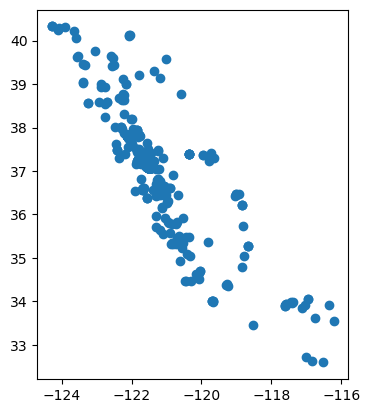

In [19]:
pigs_recent.plot()

### `matplotlib`'s `fig` and `ax`

We use `matplotlib` to create more complex, customzed graphs, like maps. 

We can interact with `matplotlib` via `pyplot` interface, which we imported as


```python
import matplotlib.pyplot as plt
```

`matplotlib` graphs the data in a **figure** that can have one or more **axes**. The axis is only the area specified by the x-y axis and what is plotted in it.

To initialize a blank figure:
1. Initialize blank figure and axis by calling `pyplot` `subplots()`  functon,
2. show graph using plt.show()

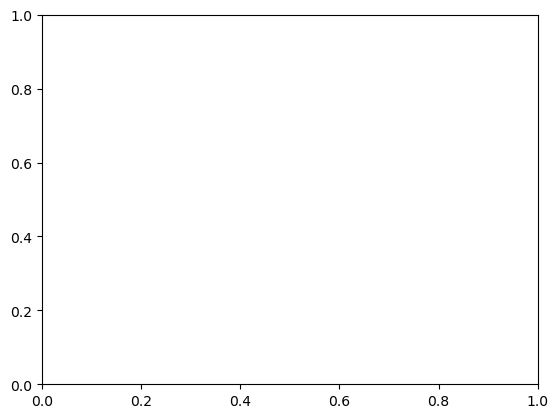

In [24]:
# create a blank figure (fig) and an empyty axis (ax)

fig, ax = plt.subplots()

# display figure 
plt.show()

## Adding a layer

When using `matplotlib` it can be useful to think of creating a plot by adding layers to the axis

General syntax to plot 
```python
# create a new figure 
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax = ax,
       ...) # other aruguments

# display figure 
plt.show()

```

**Example**

The first layer we want to add to our ais is the `pigs_recent` point data.

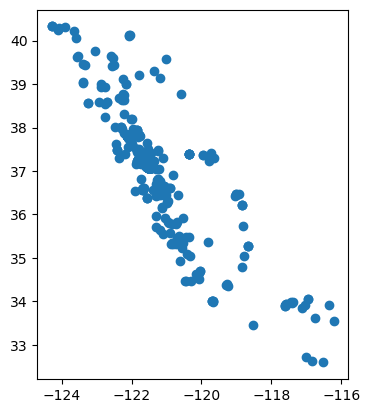

In [25]:
# create a new figure and axis 
fig, ax = plt.subplots()

# add pigs point plot to our figures acis 
pigs_recent.plot(ax = ax)

# display figure 
plt.show()

### Customization 

Matplotlib allows for a lot of customization. 

Some DIRECTLY into the `plot()` function, and others happen by updating attributes from the axis `ax`.

In [28]:
# initialize an empty figure 
fig, ax = plt.subplots()

# add data to acis 
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'red')

# update axis
ax.set_title('Reported Wild Pig Citings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

## Exercise

1. Open CA boundary shapefile and store as ca_boundary. How many features does it have?
2. Add it to pig sighitngs graph to that CA boundary appears BEHIND the points

In [35]:
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

# has 15 attributes; but 1 feature
ca_boundary.info()

<AxesSubplot:>

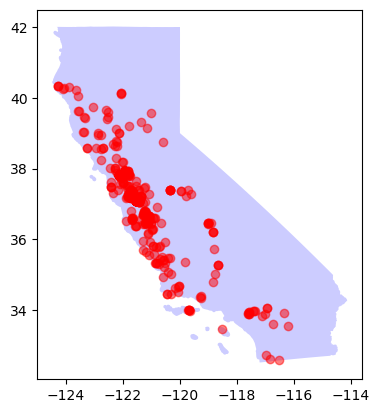

In [ ]:
# initialize an empty figure 
fig, ax = plt.subplots()

# add data to acis 
ca_boundary.plot(ax = ax,
                alpha = 0.2,
                color = 'blue')
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'red')


# update axis
#ax.set_title('Reported Wild Pig Citings in CA (2020-2023)')
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')

Text(139.46352036527887, 0.5, 'Latitude')

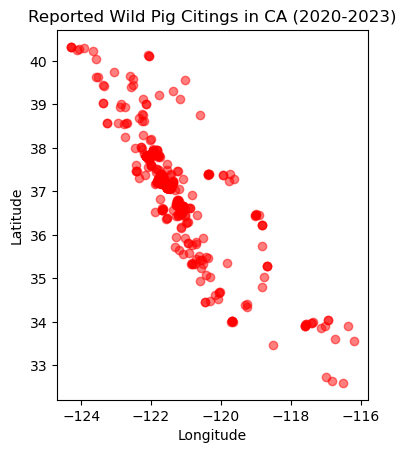